In [1]:
#Import
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize

In [2]:
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('../Data/V10/dblp-ref/dblp-ref-0.json', lines=True)

In [4]:
df.sort_values(by=['Topic'], ascending=False).head(5)


,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio,sentiment
370410,When shortest path routing is employed in larg...,"[Parth H. Pathak, Rudra Dutta]",299f7ac7-ed60-4408-a5d3-1b245170e2c6,18,"[1442629d-96f2-4c1d-886b-adf7f7784991, 177cbc6...",Centrality-based power control for hot-spot mi...,288,2012,0,2,25.0,9,NaN,8.0,NaN,1
179191,Web service technologies are becoming a new pa...,"[Jianguo Lu, Yijun Yu, John Mylopoulos]",ae6e266c-18f5-434e-af48-1098847fe6cf,50,"[00b04479-dab4-4127-a7ea-15d22a16de99, 35d1f91...",A Lightweight Approach to Semantic Web Service...,0,2005,73,3,12.0,9,0.000000,6.0,0.0,1
343078,Computer networks and computer systems are exp...,[Robert C. Newman],1c385f55-ac9c-4ec3-b1fd-64930c302312,50,[self],"Cybercrime, identity theft, and fraud: practic...",2529,2006,58,1,0.0,9,NaN,NaN,NaN,-1
179188,"In a large-scale space, structure is at a sign...",[Benjamin Kuipers],ae6cd4c2-6f6b-49bb-baa8-232b394b171f,419,[self],Navigation and mapping in large-scale space,102,1988,2904,1,0.0,9,1126.560491,NaN,NaN,1
296997,The proliferation of data in the past decade h...,"[Aritra Dasgupta, Robert Kosara]",05a4c564-4033-40a2-a6ca-17fb9054b12c,9,"[0f11d2d9-069c-4c6c-9f5d-457bd002ae0b, 13d9f1f...",Privacy-preserving data visualization using pa...,1572,2011,50,2,19.0,9,NaN,4.0,NaN,1


In [5]:
df_copy = df.copy()

In [6]:
from  itertools import chain

df_flatten_authors = pd.DataFrame({
        "abstract": np.repeat(df.abstract.values, df.authors.str.len()),
        "authors": list(chain.from_iterable(df.authors)),
        "id": np.repeat(df.id.values, df.authors.str.len()),
        "n_citation": np.repeat(df.n_citation.values, df.authors.str.len()),
        "references": np.repeat(df.references.values, df.authors.str.len()),
        "title": np.repeat(df.title.values, df.authors.str.len()),
        "venue": np.repeat(df.venue.values, df.authors.str.len()),
        "year": np.repeat(df.year.values, df.authors.str.len()),
        "Topic": np.repeat(df.Topic.values, df.authors.str.len())
})

In [7]:
df_flatten_authors_copy = df_flatten_authors.copy()

In [8]:
def h_index_utility(series):
    count = 0
    sortedSeries = np.sort(series)
    sortedSeries = sortedSeries[::-1]
    i = 1
    for item in sortedSeries:
        if (item < i): #check on equality
            break
        i+=1    
    #series['h_index'] = (i-1)
    return (i-1)

In [9]:
df_flatten_authors_h_index = df_flatten_authors.groupby('authors').agg({'n_citation' : ['sum', h_index_utility]})
df_flatten_authors_h_index.columns = ["_".join(x) for x in df_flatten_authors_h_index.columns.ravel()]
df_flatten_authors_h_index['author_name'] = df_flatten_authors_h_index.index


In [10]:
df_flatten_authors_topic = df_flatten_authors.groupby('authors').agg({'Topic':lambda x: list(x)})


In [11]:
df_flatten_authors_topic['author_name'] = df_flatten_authors_topic.index

In [12]:
df_authors = pd.merge(df_flatten_authors_h_index, df_flatten_authors_topic, how='inner', on='author_name')


In [ ]:
df_authors.to_pickle('authors_dataframe')

In [13]:
from  itertools import chain

df_authors_flatten_topic = pd.DataFrame({
        "n_citation_sum": np.repeat(df_authors.n_citation_sum.values, df_authors.Topic.str.len()),
        "n_citation_h_index_utility": np.repeat(df_authors.n_citation_h_index_utility.values, df_authors.Topic.str.len()),
        "author_name": np.repeat(df_authors.author_name.values, df_authors.Topic.str.len()),
        "Topic": list(chain.from_iterable(df_authors.Topic)),
})

In [14]:
df_flatten_authors[df_flatten_authors['authors'] == 'Fred D. Davis']


,abstract,authors,id,n_citation,references,title,venue,year,Topic
54673,"Over the past decade, information technology h...",Fred D. Davis,8b123cb5-8fb3-4e61-8a77-9fafcbd10df7,48,"[2a63d673-7a61-4825-b083-1f2a536f09b9, 38b282f...",Trusting Humans and Avatars: Behavioral and Ne...,2697,2011,6
329568,"Seeking to improve software development, many ...",Fred D. Davis,9fdf7736-2363-4c03-8833-31e2dcb17fbf,178,"[017d7159-547c-4627-9a45-d98331ed2892, 22c866d...",Investigating Determinants of Software Develop...,1235,2003,4
515954,Valid measurement scales for predicting user a...,Fred D. Davis,9d912297-e52f-4ab6-add4-633e0f263933,27068,"[123c0f7a-4341-4a95-bb80-824a969eda20, 34f5c3e...","Perceived usefulness, perceived ease of use, a...",1394,1989,6
614945,Information technology use is typically assume...,Fred D. Davis,fee5526e-8c32-40c8-abb4-74a8fb926c6f,24,"[0c2d94e7-f515-45b7-87fa-6421eb29dd61, 0e740d1...",Good habits gone bad: Explaining negative cons...,728,2015,0
759439,"Avatars, as virtual humans possessing realisti...",Fred D. Davis,190a1168-0d2c-43db-8462-5fe58c001fbb,64,"[1a47b416-9576-4280-9aa2-09858377a2ce, 20dff23...",Trusting Humans and Avatars: A Brain Imaging S...,1235,2014,5


In [15]:
df_result = df.copy()

In [16]:
df_result.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio,sentiment
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN,1
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN,0
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.000000,1
7,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9,430.434035,9.0,47.826004,1
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5,2.482948,2.0,1.241474,-1


In [17]:
df_time = df[['year', 'n_citation']].copy()

df_time['year_citation_sum'] = df_time['n_citation']
df_time['year_citation_max'] = df_time['n_citation']
df_time['year_citation_count'] = df_time['n_citation']

df_time = df_time.drop(columns = ['n_citation'])

df_time = df_time.groupby('year').agg({'year_citation_sum' : 'sum', 'year_citation_max' : 'max', 'year_citation_count' : 'count'})

df_time['year'] = df_time.index

df_time['year_citation_avg'] = df_time['year_citation_sum']/df_time['year_citation_count']

df = pd.merge(df, df_time[['year', 'year_citation_sum', 'year_citation_max', 'year_citation_count', 'year_citation_avg']], how='left', on='year')



/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df['age'] = 2018-df['year']

In [19]:
df_venue = df[['venue', 'n_citation']].copy()

df_venue['venue_citation_sum'] = df_venue['n_citation']
df_venue['venue_citation_max'] = df_venue['n_citation']
df_venue['venue_citation_count'] = df_venue['n_citation']

df_venue = df_venue.drop(columns = ['n_citation'])

df_venue = df_venue.groupby('venue').agg({'venue_citation_sum' : 'sum', 'venue_citation_max' : 'max', 'venue_citation_count' : 'count'})

df_venue['venue'] = df_venue.index

df_venue['venue_citation_avg'] = df_venue['venue_citation_sum']/df_venue['venue_citation_count']

df = pd.merge(df, df_venue[['venue', 'venue_citation_sum', 'venue_citation_max', 'venue_citation_count', 'venue_citation_avg']], how='left', on='venue')


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'venue' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df.dtypes

abstract                 object
authors                  object
id                       object
n_citation                int64
references               object
title                    object
venue                     int64
year                      int64
importance                int64
author_count              int64
references_count        float64
Topic                     int64
pageRankValue           float64
totalOutbounds          float64
ratio                   float64
sentiment                 int64
year_citation_sum         int64
year_citation_max         int64
year_citation_count       int64
year_citation_avg       float64
age                       int64
venue_citation_sum        int64
venue_citation_max        int64
venue_citation_count      int64
venue_citation_avg      float64
dtype: object

In [21]:
df_domain = df[['Topic', 'n_citation']].copy()

df_domain['domain_citation_sum'] = df_domain['n_citation']
df_domain['domain_citation_max'] = df_domain['n_citation']
df_domain['domain_citation_count'] = df_domain['n_citation']

df_domain = df_domain.drop(columns = ['n_citation'])

df_domain = df_domain.groupby('Topic').agg({'domain_citation_sum' : 'sum', 'domain_citation_max' : 'max', 'domain_citation_count' : 'count'})

df_domain['Topic'] = df_domain.index

df_domain['domain_citation_avg'] = df_domain['domain_citation_sum']/df_domain['domain_citation_count']

df = pd.merge(df, df_domain[['Topic', 'domain_citation_sum', 'domain_citation_max', 'domain_citation_count', 'domain_citation_avg']], how='left', on='Topic')


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'Topic' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df_citation_sentiment = pd.read_pickle('../Pickle/pickle_citation_sentiment_analysis')

In [23]:
df_citation_sentiment.dtypes

id                     object
sentiment               int64
citation_sentiment    float64
dtype: object

In [24]:
df = pd.merge(df, df_citation_sentiment[['id', 'citation_sentiment']], how='inner', on='id')


In [25]:
df.dtypes

abstract                  object
authors                   object
id                        object
n_citation                 int64
references                object
title                     object
venue                      int64
year                       int64
importance                 int64
author_count               int64
references_count         float64
Topic                      int64
pageRankValue            float64
totalOutbounds           float64
ratio                    float64
sentiment                  int64
year_citation_sum          int64
year_citation_max          int64
year_citation_count        int64
year_citation_avg        float64
age                        int64
venue_citation_sum         int64
venue_citation_max         int64
venue_citation_count       int64
venue_citation_avg       float64
domain_citation_sum        int64
domain_citation_max        int64
domain_citation_count      int64
domain_citation_avg      float64
citation_sentiment       float64
dtype: obj

In [26]:
df['time_factor'] = (df['n_citation'])/(df['year_citation_sum']*df['year_citation_max'])

In [27]:
df_reach_value = pd.read_pickle('../Pickle/reach_df_join.pkl')

In [28]:
df_reach_value.dtypes

id        object
reach    float64
dtype: object

In [29]:
df = pd.merge(df, df_reach_value[['id', 'reach']], how='inner', on='id')


In [30]:
df.dtypes

abstract                  object
authors                   object
id                        object
n_citation                 int64
references                object
title                     object
venue                      int64
year                       int64
importance                 int64
author_count               int64
references_count         float64
Topic                      int64
pageRankValue            float64
totalOutbounds           float64
ratio                    float64
sentiment                  int64
year_citation_sum          int64
year_citation_max          int64
year_citation_count        int64
year_citation_avg        float64
age                        int64
venue_citation_sum         int64
venue_citation_max         int64
venue_citation_count       int64
venue_citation_avg       float64
domain_citation_sum        int64
domain_citation_max        int64
domain_citation_count      int64
domain_citation_avg      float64
citation_sentiment       float64
time_facto

In [31]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,...,venue_citation_max,venue_citation_count,venue_citation_avg,domain_citation_sum,domain_citation_max,domain_citation_count,domain_citation_avg,citation_sentiment,time_factor,reach
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,...,120,110,33.754545,1066046,11411,18674,57.087180,0.0,8.399536e-09,7.0
1,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,...,567,1485,32.777778,2808556,73362,51247,54.804301,0.0,5.500736e-09,2.0
2,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,...,73362,41253,54.262526,1683285,15096,30371,55.424089,1.0,6.520059e-08,0.0
3,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,...,1988,140,215.914286,2265051,11120,43445,52.136057,4.0,4.063689e-09,6.0
4,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,...,73362,41253,54.262526,2628141,10199,47091,55.809836,1.0,6.345459e-09,4.0


In [ ]:
df.to_pickle('complete_data')

In [32]:
df_paper_ranking = df[['id', 'authors', 'pageRankValue', 'n_citation', 'domain_citation_avg', 'citation_sentiment', 'time_factor', 'venue_citation_avg', 'age', 'reach', 'importance']]


In [34]:
df_paper_ranking.dtypes

id                      object
authors                 object
pageRankValue          float64
n_citation               int64
domain_citation_avg    float64
citation_sentiment     float64
time_factor            float64
venue_citation_avg     float64
age                      int64
reach                  float64
importance               int64
dtype: object

In [35]:
df_paper_ranking.head()

,id,authors,pageRankValue,n_citation,domain_citation_avg,citation_sentiment,time_factor,venue_citation_avg,age,reach,importance
0,001c8744-73c4-4b04-9364-22d31a10dbf1,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",NaN,50,57.087180,0.0,8.399536e-09,33.754545,9,7.0,0
1,00bcf2d5-1592-46b0-81fd-933f90b5ecca,"[Alvaro L. Islas, Constance M. Schober]",NaN,50,54.804301,0.0,5.500736e-09,32.777778,16,2.0,50
2,00c85316-bddf-4bcb-93f5-097adadd73c2,"[Patrick Cousot, Radhia Cousot]",0.000000,50,55.424089,1.0,6.520059e-08,54.262526,27,0.0,12
3,010d4ce9-0279-4166-ae73-14551ded6404,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",430.434035,50,52.136057,4.0,4.063689e-09,215.914286,10,6.0,1311
4,012b88ae-a763-45d6-8f19-2ec9ff739d5f,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",2.482948,50,55.809836,1.0,6.345459e-09,54.262526,14,4.0,154


In [36]:
""" Z score calculation """

' Z score calculation '

In [37]:
df_paper_ranking_plus_z_score = df_paper_ranking.copy()

In [38]:
columns = ['pageRankValue', 'n_citation', 'domain_citation_avg', 'citation_sentiment', 'time_factor', 'venue_citation_avg', 'age', 'reach', 'importance']

for column in columns:
    col_zscore = column + '_Zscore'
    df_paper_ranking_plus_z_score[col_zscore] = (df_paper_ranking_plus_z_score[column] - df_paper_ranking_plus_z_score[column].mean())/df_paper_ranking_plus_z_score[column].std()
    

In [39]:
df_paper_ranking_plus_z_score

,id,authors,pageRankValue,n_citation,domain_citation_avg,citation_sentiment,time_factor,venue_citation_avg,age,reach,importance,pageRankValue_Zscore,n_citation_Zscore,domain_citation_avg_Zscore,citation_sentiment_Zscore,time_factor_Zscore,venue_citation_avg_Zscore,age_Zscore,reach_Zscore,importance_Zscore
0,001c8744-73c4-4b04-9364-22d31a10dbf1,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",NaN,50,57.087180,0.0,8.399536e-09,33.754545,9,7.000000,0,NaN,-0.022671,1.193432,-0.224863,-0.005373,-0.621170,-0.452746,NaN,-0.196895
1,00bcf2d5-1592-46b0-81fd-933f90b5ecca,"[Alvaro L. Islas, Constance M. Schober]",NaN,50,54.804301,0.0,5.500736e-09,32.777778,16,2.000000,50,NaN,-0.022671,0.018560,-0.224863,-0.005422,-0.650044,0.534114,NaN,-0.150295
2,00c85316-bddf-4bcb-93f5-097adadd73c2,"[Patrick Cousot, Radhia Cousot]",0.000000,50,55.424089,1.0,6.520059e-08,54.262526,27,0.000000,12,-0.133274,-0.022671,0.337531,-0.080156,-0.004412,-0.014949,2.084894,NaN,-0.185711
3,010d4ce9-0279-4166-ae73-14551ded6404,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",430.434035,50,52.136057,4.0,4.063689e-09,215.914286,10,6.000000,1311,1.018710,-0.022671,-1.354637,0.353965,-0.005446,4.763519,-0.311766,NaN,1.024955
4,012b88ae-a763-45d6-8f19-2ec9ff739d5f,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",2.482948,50,55.809836,1.0,6.345459e-09,54.262526,14,4.000000,154,-0.126628,-0.022671,0.536054,-0.080156,-0.005408,-0.014949,0.252154,NaN,-0.053367
5,016a9a21-e882-4cda-a2b1-b2b46f10601e,"[Michel Abdalla, Jill-Jênn Vie]",NaN,50,53.176394,0.0,1.575309e-08,54.262526,6,5.000000,0,NaN,-0.022671,-0.819233,-0.224863,-0.005249,-0.014949,-0.875686,NaN,-0.196895
6,01705f09-d395-4a0f-a89f-8d18382c81cc,"[Mark Burgess, Alva L. Couch]",0.000000,8,54.804301,1.0,2.765868e-09,35.081967,7,inf,2,-0.133274,-0.222363,0.018560,-0.080156,-0.005468,-0.581931,-0.734706,NaN,-0.195031
7,01b6f2ca-3903-4196-a932-47a4be4c00bf,"[Constantinos Giannoulis, Jelena Zdravkovic, M...",0.000000,12,55.262050,0.0,3.780742e-09,54.262526,6,6.000000,56,-0.133274,-0.203345,0.254138,-0.224863,-0.005451,-0.014949,-0.875686,NaN,-0.144703
8,02a5e8a8-061e-4c1f-ab16-bda035578e54,"[Qiong Liu, You Yang, Xu Wang, Liujuan Cao]",NaN,3,58.304374,0.0,5.737064e-10,33.325503,5,5.000000,0,NaN,-0.246136,1.819854,-0.224863,-0.005505,-0.633853,-1.016666,NaN,-0.196895
9,03990c4b-45be-4913-80d6-27d3b3381b36,"[Ying Wu, Thomas K. Doyle, Colin Fyfe]",NaN,50,52.136057,0.0,1.728668e-08,32.703297,7,4.000000,4,NaN,-0.022671,-1.354637,-0.224863,-0.005223,-0.652245,-0.734706,NaN,-0.193167


In [40]:
df_paper_ranking_zscore = df_paper_ranking_plus_z_score[['id', 'authors', 'pageRankValue_Zscore', 'n_citation_Zscore', 'domain_citation_avg_Zscore', 'citation_sentiment_Zscore', 'time_factor_Zscore', 'venue_citation_avg_Zscore', 'age_Zscore', 'reach_Zscore', 'importance_Zscore']]


In [43]:
df_paper_ranking_zscore.head()

,id,authors,pageRankValue_Zscore,n_citation_Zscore,domain_citation_avg_Zscore,citation_sentiment_Zscore,time_factor_Zscore,venue_citation_avg_Zscore,age_Zscore,reach_Zscore,importance_Zscore
0,001c8744-73c4-4b04-9364-22d31a10dbf1,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",0.000000,-0.022671,1.193432,-0.224863,-0.005373,-0.621170,-0.452746,0.0,-0.196895
1,00bcf2d5-1592-46b0-81fd-933f90b5ecca,"[Alvaro L. Islas, Constance M. Schober]",0.000000,-0.022671,0.018560,-0.224863,-0.005422,-0.650044,0.534114,0.0,-0.150295
2,00c85316-bddf-4bcb-93f5-097adadd73c2,"[Patrick Cousot, Radhia Cousot]",-0.133274,-0.022671,0.337531,-0.080156,-0.004412,-0.014949,2.084894,0.0,-0.185711
3,010d4ce9-0279-4166-ae73-14551ded6404,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",1.018710,-0.022671,-1.354637,0.353965,-0.005446,4.763519,-0.311766,0.0,1.024955
4,012b88ae-a763-45d6-8f19-2ec9ff739d5f,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",-0.126628,-0.022671,0.536054,-0.080156,-0.005408,-0.014949,0.252154,0.0,-0.053367


In [44]:
df_paper_ranking_zscore['ranking_score'] = 10*df_paper_ranking_zscore['pageRankValue_Zscore'] + 5*df_paper_ranking_zscore['n_citation_Zscore']  + (df_paper_ranking_zscore['time_factor_Zscore'] + df_paper_ranking_zscore['venue_citation_avg_Zscore'] + df_paper_ranking_zscore['citation_sentiment_Zscore'] + df_paper_ranking_zscore['reach_Zscore'] + df_paper_ranking_zscore['importance_Zscore']) - (df_paper_ranking_zscore['age_Zscore'] + df_paper_ranking_zscore['domain_citation_avg_Zscore']) / 5



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_paper_ranking_zscore.head()

,id,authors,pageRankValue_Zscore,n_citation_Zscore,domain_citation_avg_Zscore,citation_sentiment_Zscore,time_factor_Zscore,venue_citation_avg_Zscore,age_Zscore,reach_Zscore,importance_Zscore,ranking_score
0,001c8744-73c4-4b04-9364-22d31a10dbf1,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",0.000000,-0.022671,1.193432,-0.224863,-0.005373,-0.621170,-0.452746,0.0,-0.196895,-1.309793
1,00bcf2d5-1592-46b0-81fd-933f90b5ecca,"[Alvaro L. Islas, Constance M. Schober]",0.000000,-0.022671,0.018560,-0.224863,-0.005422,-0.650044,0.534114,0.0,-0.150295,-1.254513
2,00c85316-bddf-4bcb-93f5-097adadd73c2,"[Patrick Cousot, Radhia Cousot]",-0.133274,-0.022671,0.337531,-0.080156,-0.004412,-0.014949,2.084894,0.0,-0.185711,-2.215803
3,010d4ce9-0279-4166-ae73-14551ded6404,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",1.018710,-0.022671,-1.354637,0.353965,-0.005446,4.763519,-0.311766,0.0,1.024955,16.544018
4,012b88ae-a763-45d6-8f19-2ec9ff739d5f,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",-0.126628,-0.022671,0.536054,-0.080156,-0.005408,-0.014949,0.252154,0.0,-0.053367,-1.691160


In [46]:
df_paper_ranking_authors = pd.merge(df_paper_ranking[['id', 'authors', 'pageRankValue', 'n_citation']], df_paper_ranking_zscore[['id', 'ranking_score']], how='inner', on='id')
    

In [48]:
df_paper_ranking_authors = pd.merge(df_paper_ranking_authors, df_result[['id', 'Topic']], how='inner', on='id')


In [49]:
from  itertools import chain

df_paper_ranking_zscore_flatten_authors = pd.DataFrame({
        "authors": list(chain.from_iterable(df_paper_ranking_authors.authors)),
        "id": np.repeat(df_paper_ranking_authors.id.values, df_paper_ranking_authors.authors.str.len()),
        "n_citation": np.repeat(df_paper_ranking_authors.n_citation.values, df_paper_ranking_authors.authors.str.len()),
        "pageRankValue": np.repeat(df_paper_ranking_authors.pageRankValue.values, df_paper_ranking_authors.authors.str.len()),
        "ranking_score": np.repeat(df_paper_ranking_authors.ranking_score.values, df_paper_ranking_authors.authors.str.len()),
        "Topic": np.repeat(df_paper_ranking_authors.Topic.values, df_paper_ranking_authors.authors.str.len())
})

In [50]:
df_paper_ranking_zscore_flatten_authors_final = df_paper_ranking_zscore_flatten_authors.groupby('authors').agg({'n_citation' : ['sum', h_index_utility], 'ranking_score' : 'sum', 'pageRankValue' : 'sum', 'Topic' : 'first' })
df_paper_ranking_zscore_flatten_authors_final.columns = ["_".join(x) for x in df_paper_ranking_zscore_flatten_authors_final.columns.ravel()]
df_paper_ranking_zscore_flatten_authors_final['author_name'] = df_paper_ranking_zscore_flatten_authors_final.index


In [51]:
df_paper_ranking_zscore_flatten_authors_final.sort_values(by=['n_citation_sum'], ascending=False).head(5)

,n_citation_sum,n_citation_h_index_utility,ranking_score_sum,pageRankValue_sum,Topic_first,author_name
authors,,,,,,
David E. Goldberg,89575,50,4341.724676,69615.152289,0,David E. Goldberg
Adi Shamir,31628,37,3434.173326,90162.823124,4,Adi Shamir
Fred D. Davis,27382,5,1317.525037,14425.459503,6,Fred D. Davis
Bernhard Schölkopf,25111,39,1232.742743,16054.403992,5,Bernhard Schölkopf
Detmar W. Straub,24757,21,1264.055316,11546.262271,4,Detmar W. Straub


In [54]:
df_author.head()

,n_citation_sum,n_citation_h_index_utility,ranking_score_sum,pageRankValue_sum,Topic_first,author_name
authors,,,,,,
David E. Goldberg,89575,50,4341.724676,69615.152289,0,David E. Goldberg
Adi Shamir,31628,37,3434.173326,90162.823124,4,Adi Shamir
Fred D. Davis,27382,5,1317.525037,14425.459503,6,Fred D. Davis
Bernhard Schölkopf,25111,39,1232.742743,16054.403992,5,Bernhard Schölkopf
Detmar W. Straub,24757,21,1264.055316,11546.262271,4,Detmar W. Straub


In [55]:
df_author_present = df_author[['author_name', 'n_citation_h_index_utility', 'ranking_score_sum']]

In [56]:
df_author_present.rename(columns={'author_name':'Author', 'n_citation_h_index_utility' : 'h_index', 'ranking_score_sum' : 'Ranking_score'}, inplace=True)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [57]:
df_author_present.head()

,Author,h_index,Ranking_score
authors,,,
David E. Goldberg,David E. Goldberg,50,4341.724676
Adi Shamir,Adi Shamir,37,3434.173326
Fred D. Davis,Fred D. Davis,5,1317.525037
Bernhard Schölkopf,Bernhard Schölkopf,39,1232.742743
Detmar W. Straub,Detmar W. Straub,21,1264.055316


In [58]:
df_author_present.sort_values(by=['Ranking_score'], ascending=False).head(15)

,Author,h_index,Ranking_score
authors,,,
David E. Goldberg,David E. Goldberg,50,4341.724676
Adi Shamir,Adi Shamir,37,3434.173326
John E. Hopcroft,John E. Hopcroft,15,2752.775107
Ronald L. Rivest,Ronald L. Rivest,28,2625.492943
Alfred V. Aho,Alfred V. Aho,14,1955.616077
Leonard M. Adleman,Leonard M. Adleman,6,1912.688419
Robin Milner,Robin Milner,16,1893.630928
Robert E. Schapire,Robert E. Schapire,27,1481.210967
Robert Endre Tarjan,Robert Endre Tarjan,48,1431.070700


In [59]:
df_author_present['Rank'] = df_author_present['Ranking_score'].rank(ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_author_present.sort_values(by=['Ranking_score'], ascending=False).head(20)

,Author,h_index,Ranking_score,Rank
authors,,,,
David E. Goldberg,David E. Goldberg,50,4341.724676,1.0
Adi Shamir,Adi Shamir,37,3434.173326,2.0
John E. Hopcroft,John E. Hopcroft,15,2752.775107,3.0
Ronald L. Rivest,Ronald L. Rivest,28,2625.492943,4.0
Alfred V. Aho,Alfred V. Aho,14,1955.616077,5.0
Leonard M. Adleman,Leonard M. Adleman,6,1912.688419,6.0
Robin Milner,Robin Milner,16,1893.630928,7.0
Robert E. Schapire,Robert E. Schapire,27,1481.210967,8.0
Robert Endre Tarjan,Robert Endre Tarjan,48,1431.070700,9.0


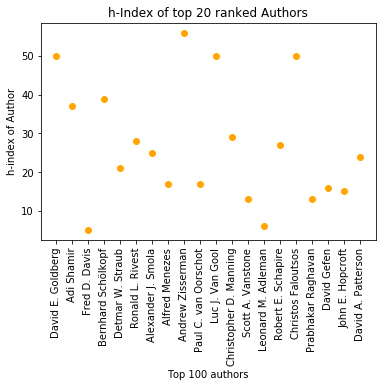

In [61]:
top_10_authors = df_author_present[0:20] 
#ranks = list(range(0, 20))

h_indices = top_10_authors['h_index'].values
names = top_10_authors['Author'].values
plt.xticks(rotation=90)
#plt.plot(names, h_indices, color='orange')
plt.scatter(names, h_indices, color='orange')
plt.xlabel('Top 100 authors')
plt.ylabel('h-index of Author')
plt.title('h-Index of top 20 ranked Authors')
plt.show()

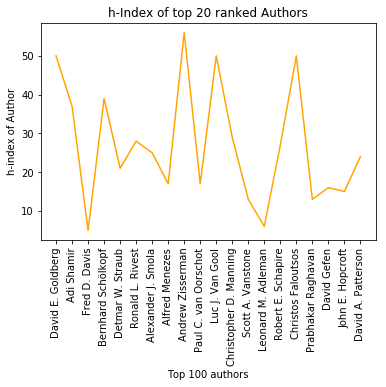

In [62]:
top_10_authors = df_author_present[0:20] 
#ranks = list(range(0, 20))

h_indices = top_10_authors['h_index'].values
names = top_10_authors['Author'].values
plt.xticks(rotation=90)
plt.plot(names, h_indices, color='orange')
#plt.scatter(names, h_indices, color='orange')
plt.xlabel('Top 100 authors')
plt.ylabel('h-index of Author')
plt.title('h-Index of top 20 ranked Authors')
plt.show()

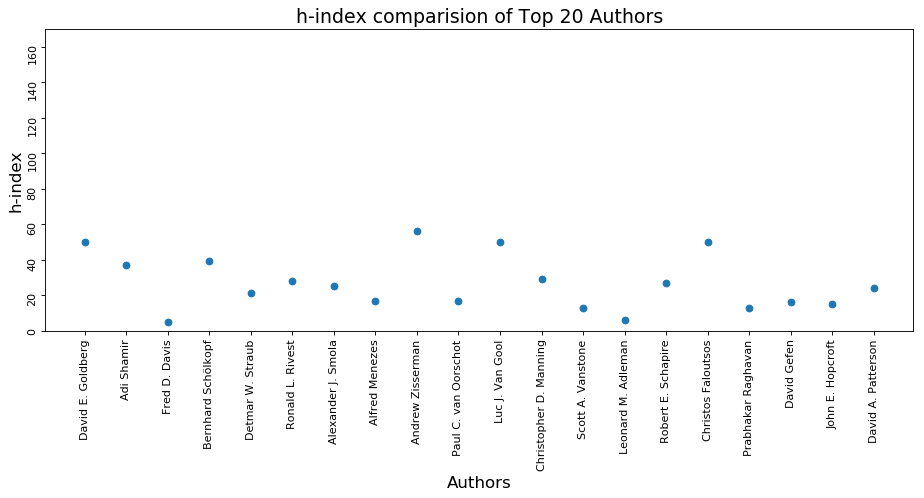

In [63]:
#fig = plt.figure(num=None, figsize = (14,7), dpi=80, facecolor='w', edgecolor='k')
fig = plt.figure(num=None, figsize = (14,5), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(1, 1, 1)
g1 = plt.scatter(names, h_indices)
ax.set_ylim([0,170])
ax.set_title('h-index comparision of Top 20 Authors', fontsize=17)
ax.set_xlabel('Authors', fontsize=15)
ax.set_ylabel('h-index', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10, rotation=90)

fig.savefig('h_index_comparision.png', dpi=100)

In [64]:
df_author_present1.rename(columns={'author_name':'Author', 'n_citation_h_index_utility' : 'h_index', 'ranking_score_sum' : 'Ranking_score', 'Topic_first' : 'Discipline'}, inplace=True)

df_author_present1['Rank'] = df_author_present1['Ranking_score'].rank(ascending=False)

df_author_present1.sort_values(by=['Ranking_score'], ascending=False).head(20)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Author,h_index,Ranking_score,Discipline,Rank
0,Thomas G. Dietterich,71,1196.113987,Computational Geometry,1.0
1,Daphne Koller,131,1180.739357,Computational Geometry,2.0
2,Philip A. Bernstein,76,881.935901,Computational Geometry,3.0
3,John R. Koza,9,853.141317,Computational Geometry,4.0
4,Edmund M. Clarke,101,836.400604,Computational Geometry,5.0
5,Terry Winograd,60,752.561708,Computational Geometry,6.0
6,David Gefen,55,712.583676,Computational Geometry,7.0
7,Moni Naor,87,674.594621,Computational Geometry,8.0
8,Serge Abiteboul,81,617.460778,Computational Geometry,9.0
9,Moshe Y. Vardi,100,491.765165,Computational Geometry,10.0


In [65]:
df_author_present2.rename(columns={'author_name':'Author', 'n_citation_h_index_utility' : 'h_index', 'ranking_score_sum' : 'Ranking_score', 'Topic_first' : 'Discipline'}, inplace=True)

df_author_present2['Rank'] = df_author_present2['Ranking_score'].rank(ascending=False)

df_author_present2.sort_values(by=['Ranking_score'], ascending=False).head(20)




/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Author,h_index,Ranking_score,Discipline,Rank
5,John E. Hopcroft,57,2752.775107,Computational Biology,1.0
4,Robert E. Schapire,75,1481.210967,Computational Biology,2.0
2,Luc J. Van Gool,125,1390.815413,Computational Biology,3.0
1,Andrew Zisserman,145,1351.951449,Computational Biology,4.0
0,Bernhard Sch√∂lkopf,126,1232.742743,Computational Biology,5.0
6,Tinne Tuytelaars,54,1009.491141,Computational Biology,6.0
9,Gerard Salton,66,1003.872531,Computational Biology,7.0
3,Christopher D. Manning,108,717.860161,Computational Biology,8.0
13,Biing-Hwang Juang,48,578.859808,Computational Biology,9.0
17,Lawrence R. Rabiner,81,574.617721,Computational Biology,10.0


In [66]:
df_author_present3.rename(columns={'author_name':'Author', 'n_citation_h_index_utility' : 'h_index', 'ranking_score_sum' : 'Ranking_score', 'Topic_first' : 'Discipline'}, inplace=True)

df_author_present3['Rank'] = df_author_present3['Ranking_score'].rank(ascending=False)

df_author_present3.sort_values(by=['Ranking_score'], ascending=False).head(20)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Author,h_index,Ranking_score,Discipline,Rank
1,Ronald L. Rivest,90,2625.492943,Algorithms,1.0
0,Fred D. Davis,41,1317.525037,Algorithms,2.0
2,Paul C. van Oorschot,71,1169.962642,Algorithms,3.0
4,Ron Kohavi,54,899.749210,Algorithms,4.0
6,Jennifer Widom,97,837.005562,Algorithms,5.0
13,Ian Horrocks,91,828.965326,Algorithms,6.0
3,Prabhakar Raghavan,13,775.733972,Algorithms,7.0
5,Sebastian Thrun,142,720.847856,Algorithms,8.0
10,Rakesh Agrawal,103,688.615248,Algorithms,9.0
15,Advaith Siddharthan,24,566.054971,Algorithms,10.0


In [67]:
df_author_present4.rename(columns={'author_name':'Author', 'n_citation_h_index_utility' : 'h_index', 'ranking_score_sum' : 'Ranking_score', 'Topic_first' : 'Discipline'}, inplace=True)

df_author_present4['Rank'] = df_author_present4['Ranking_score'].rank(ascending=False)

df_author_present4.sort_values(by=['Ranking_score'], ascending=False).head(20)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Author,h_index,Ranking_score,Discipline,Rank
1,Christos Faloutsos,99,1161.520397,Data science,1.0
4,Berthold K. P. Horn,7,1117.636170,Data science,2.0
0,Alexander J. Smola,84,1111.652414,Data science,3.0
10,Brian G. Schunck,4,816.151113,Data science,4.0
8,Hector Garcia-Molina,133,756.780836,Data science,5.0
17,Thomas E. Anderson,25,652.914607,Data science,6.0
7,Stefan Savage,78,613.385287,Data science,7.0
14,Michalis Faloutsos,61,566.949415,Data science,8.0
15,Carl Kesselman,79,565.213136,Data science,9.0
9,Ion Stoica,119,541.258469,Data science,10.0
